# UCI Cervical Cancer Data

We will analyse the data


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.metrics import mean_squared_error, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from imblearn.under_sampling import InstanceHardnessThreshold
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
import cPickle

In [2]:
import pandas as pd
import numpy as np
import warnings
from sklearn.preprocessing import Imputer, scale
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [3]:
df = pd.read_csv("risk_factors_cervical_cancer.csv",na_values="NaN")
df
#will work without explicitly providing NaN as na_values

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.000000,37.000000,1.0,3.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.000000,0.000000,1.0,15.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.000000,3.400000,0.0,0.00,1.0,7.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.000000,0.000000,1.0,2.00,1.0,7.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,1,0,1,1,0,0,0,0
9,44,3.0,15.0,NaN,1.0,1.266973,2.800000,0.0,0.00,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0


In [4]:
y = df[u"Biopsy"]
df = df.drop(["Biopsy"], axis=1)
imp = Imputer(missing_values='NaN', strategy='mean', axis=0, copy=False)#toimpute along columns
df1 = imp.fit_transform(df)
df1 = pd.DataFrame(df1)
df1.columns = df.columns
df = df1
df["Biopsy"] = y
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18.0,4.000000,15.0000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,6.140845,5.816901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,15.0,1.000000,14.0000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,6.140845,5.816901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,34.0,1.000000,16.9953,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,6.140845,5.816901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,52.0,5.000000,16.0000,4.000000,1.000000,37.000000,37.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,6.140845,5.816901,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,46.0,3.000000,21.0000,4.000000,0.000000,0.000000,0.000000,1.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,6.140845,5.816901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,42.0,3.000000,23.0000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,6.140845,5.816901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,51.0,3.000000,17.0000,6.000000,1.000000,34.000000,3.400000,0.000000,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,6.140845,5.816901,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1
7,26.0,1.000000,26.0000,3.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,6.140845,5.816901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,45.0,1.000000,20.0000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,6.140845,5.816901,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0
9,44.0,3.000000,15.0000,2.275561,1.000000,1.266973,2.800000,0.000000,0.000000,0.112011,0.514804,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,6.140845,5.816901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [5]:
X_tr, X_te = train_test_split(df, train_size=0.75)
y_tr = X_tr["Biopsy"]
y_te = X_te["Biopsy"]
X_tr = X_tr.drop(["Biopsy"], axis=1)
X_te = X_te.drop(["Biopsy"], axis=1)
print("Training Shape: " + str(X_tr.shape))
print("Testing Shape:  " + str(X_te.shape))
print("Training Shape: " + str(y_tr.shape))
print("Testing Shape:  " + str(y_te.shape))

Training Shape: (643, 35)
Testing Shape:  (215, 35)
Training Shape: (643,)
Testing Shape:  (215,)


In [6]:
y_tem = np.sum(y_te)
print("Positive test data = " + str(y_tem))
print("Negative test data = " + str(y_te.__len__() - y_tem))
y_tem = np.sum(y_tr)
print("Positive train data = " + str(y_tem))
print("Negative train data = " + str(y_tr.__len__() - y_tem))

Positive test data = 15
Negative test data = 200
Positive train data = 40
Negative train data = 603


In [7]:
iht = InstanceHardnessThreshold(random_state=42)
X_iht, y_iht = iht.fit_sample(X_tr, y_tr)
y_tem = np.sum(y)
print("Positive data = " + str(y_tem))
print("Negative data = " + str(y_tr.__len__() - y_tem))

Positive data = 55
Negative data = 588


In [8]:
model = LogisticRegressionCV(max_iter=35, penalty='l1', solver='liblinear')
#model = SVC(kernel="poly", degree=3)
#model = GaussianNB()
#model = MultinomialNB()
model.fit(X_iht, y_iht)
score = mean_squared_error(y_iht, np.round(model.predict(X_iht)))
"Mean Squared Error CV = " + str(score)

'Mean Squared Error CV = 0.00922509225092251'

In [9]:
prob = pd.DataFrame(y_iht)
prob['prediction'] = model.predict(X_iht)
prob.columns = ["actual", "prediction"]
prob

,actual,prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [10]:
result = pd.DataFrame(model.coef_[0])
result['predictor'] = X_tr.columns
result.columns = ["coefficient", "predictor"]
result[result["coefficient"]!=0]

,coefficient,predictor
2,-0.349925,First sexual intercourse
3,0.129211,Num of pregnancies
4,-0.379073,Smokes
5,-0.052821,Smokes (years)
7,0.156968,Hormonal Contraceptives
8,-0.075106,Hormonal Contraceptives (years)
10,-0.298841,IUD (years)
26,0.061645,STDs: Time since first diagnosis
29,4.064006,Dx:CIN
30,-0.624727,Dx:HPV


[[ 36   4]
 [ 21 582]]


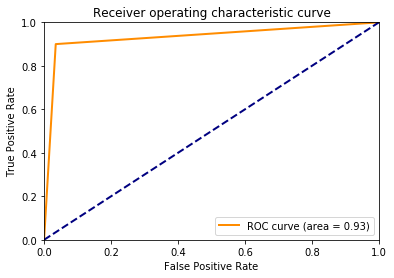

In [18]:
def generateConfusionMatrixROCandAUC(result, X, y):
    prediction = result.predict(X)
    conf_matrix = confusion_matrix(y, np.round(prediction), labels=[1,0])
    print(conf_matrix)
    fpr, tpr, threshold = roc_curve(y, prediction, pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()

generateConfusionMatrixROCandAUC(model, X_tr, y_tr)

In [12]:
score_te = mean_squared_error(y_te, np.round(model.predict(X_te)))
"Test Error  = " + str(score_te)

'Test Error  = 0.037209302325581395'

[[ 12   3]
 [  5 195]]


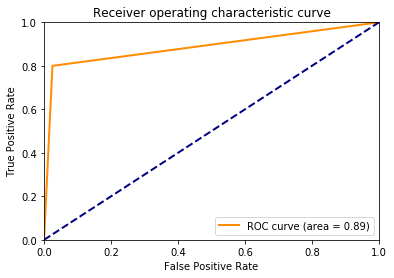

In [13]:
generateConfusionMatrixROCandAUC(model, X_te, y_te)

In [14]:
results = []
np.sum(results)>=results.__len__()/2

True

In [15]:
#filename = 'model.sav'
#cPickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
 #load the model from disk
#loaded_model = cPickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_te, y_te)
#print(result)
